<a href="https://colab.research.google.com/github/m-atique/Q2_PIAIC/blob/Assignments/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ---------------------DEEP LEARNING ASSIGNMETS--------------------------

## ASSIGNMENT 01 CAR PRICE PREDDICTION
=======================================

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

# Loadind data

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [ ]:
np.where(pd.isnull(df))  # there is not any null value

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df.shape

(205, 26)

# Data partition in to training, testing and validation

In [ ]:
df.info()  # To know about Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()  # To know about null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop(columns='car_ID', inplace=True)   # To Get more specific data
df.drop(columns='CarName', inplace=True)
df.shape

(205, 24)

In [ ]:
# BEcause of data type of some fields is object so one hot encoding is required
data = pd.get_dummies(df, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 
                                          'fuelsystem'])

In [ ]:
data.shape

(205, 53)

In [ ]:
labels = data['price']  # AS we have to pridict about price Use price as labels
print(labels)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [ ]:
data.drop(columns='price', inplace=True)  #  Data other than price
data.shape

(205, 52)

**Dividing data in to 50, 30 and 20 percent as training, testing, validation**

In [ ]:
train_data = data[:105]
train_labels = labels[:105]
test_data = data[105:166]
test_labels = labels[106:166]
val_data = data[166:]
val_labels = labels[166:]

In [ ]:
# Nornalization of data
mean = train_data.iloc[: , 0:14].mean(axis=0)
train_data.iloc[: , 0:14] -= mean
std = train_data.iloc[:, 0:14].std(axis=0)
train_data.iloc[: , 0:14] /= std 
 
#==============================================

val_data.iloc[:, 0:14] -= mean
val_data.iloc[:, 0:14] /= std
 
#===============================================
test_data.iloc[:, 0:14] -= mean
test_data.iloc[:, 0:14] /= std


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
from tensorflow.keras import models,layers

In [ ]:
najomi= models.Sequential()
najomi.add(layers.Dense(104, activation= 'relu', input_shape = (train_data.shape[1],)))
najomi.add(layers.Dense(52, activation='relu'))
najomi.add(layers.Dense(16, activation='relu'))
najomi.add(layers.Dense(1))



In [ ]:
najomi.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [ ]:
history = najomi.fit(train_data,train_labels, batch_size=16,  epochs=70, validation_data=(val_data, val_labels))

Epoch 1/70
7/7 [==============================] - 1s 33ms/step - loss: 268890546.0000 - mae: 13428.1863 - val_loss: 191242704.0000 - val_mae: 13163.6982
Epoch 2/70
7/7 [==============================] - 0s 9ms/step - loss: 317838256.0000 - mae: 14488.6626 - val_loss: 191200944.0000 - val_mae: 13162.1289
Epoch 3/70
7/7 [==============================] - 0s 8ms/step - loss: 307247572.0000 - mae: 14190.2932 - val_loss: 191133920.0000 - val_mae: 13159.6543
Epoch 4/70
7/7 [==============================] - 0s 7ms/step - loss: 294603888.0000 - mae: 14226.2291 - val_loss: 191031536.0000 - val_mae: 13155.8916
Epoch 5/70
7/7 [==============================] - 0s 9ms/step - loss: 271297114.0000 - mae: 13959.7395 - val_loss: 190883872.0000 - val_mae: 13150.5127
Epoch 6/70
7/7 [==============================] - 0s 10ms/step - loss: 279345602.0000 - mae: 14031.0142 - val_loss: 190701440.0000 - val_mae: 13143.8242
Epoch 7/70
7/7 [==============================] - 0s 8ms/step - loss: 349367144.0000 -

In [ ]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, 71)

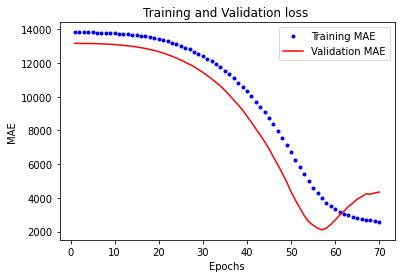

In [ ]:
plt.plot(epochs, train_mae, 'b.', label='Training MAE')
plt.plot(epochs, val_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


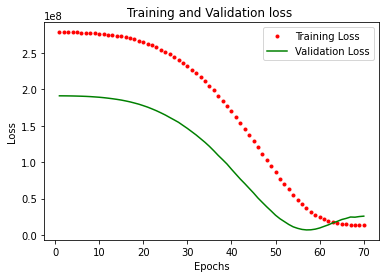

In [ ]:
plt.plot(epochs, train_loss, 'r.', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_labels

106    18399.0
107    11900.0
108    13200.0
109    12440.0
110    13860.0
111    15580.0
112    16900.0
113    16695.0
114    17075.0
115    16630.0
116    17950.0
117    18150.0
118     5572.0
119     7957.0
120     6229.0
121     6692.0
122     7609.0
123     8921.0
124    12764.0
125    22018.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
130     9295.0
131     9895.0
132    11850.0
133    12170.0
134    15040.0
135    15510.0
136    18150.0
137    18620.0
138     5118.0
139     7053.0
140     7603.0
141     7126.0
142     7775.0
143     9960.0
144     9233.0
145    11259.0
146     7463.0
147    10198.0
148     8013.0
149    11694.0
150     5348.0
151     6338.0
152     6488.0
153     6918.0
154     7898.0
155     8778.0
156     6938.0
157     7198.0
158     7898.0
159     7788.0
160     7738.0
161     8358.0
162     9258.0
163     8058.0
164     8238.0
165     9298.0
Name: price, dtype: float64

In [ ]:
najomi.predict(test_data)

array([[19450.514 ],
       [20842.86  ],
       [21554.377 ],
       [21786.3   ],
       [23575.668 ],
       [25655.365 ],
       [21524.217 ],
       [21886.473 ],
       [23095.021 ],
       [25759.428 ],
       [21652.865 ],
       [21886.473 ],
       [22157.223 ],
       [ 4333.0967],
       [ 7610.9746],
       [ 5024.2793],
       [ 5788.711 ],
       [ 6183.6113],
       [15774.715 ],
       [17476.492 ],
       [19025.822 ],
       [15183.795 ],
       [15183.795 ],
       [15336.283 ],
       [26074.967 ],
       [15966.584 ],
       [14616.529 ],
       [17842.996 ],
       [18324.67  ],
       [14039.226 ],
       [18433.703 ],
       [18672.584 ],
       [19158.496 ],
       [ 7382.323 ],
       [10190.975 ],
       [10307.197 ],
       [10887.349 ],
       [12817.619 ],
       [12973.012 ],
       [14129.402 ],
       [14357.591 ],
       [11919.581 ],
       [12940.683 ],
       [13269.619 ],
       [15135.521 ],
       [ 6319.2856],
       [ 7128.4604],
       [ 6923